<a href="https://colab.research.google.com/github/Abre1234/Transport-and-logistics-sample/blob/main/Sample_logistics_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sample for Transport and Logistics

Import required libraries

In [3]:

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Deployment (optional)
import gradio as gr

Load dataset

In [4]:

# Load the logistics dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transport and logistics dataset/logistics_cost.csv')

# Preview the first few rows
df.head()

,Distance_km,Traffic_Level,Vehicle_Type,Fuel_Price,Total_Delivery_Cost
0,1.0,Low,Bajaj,65,10
1,2.0,Medium,Bajaj,65,12
2,3.0,High,Taxi Damas,68,16
3,4.0,Medium,Taxi Damas,68,18
4,5.0,High,Taxi,70,25


Check null values

In [5]:
df.isnull().sum()

,0
Distance_km,0
Traffic_Level,0
Vehicle_Type,0
Fuel_Price,0
Total_Delivery_Cost,0


See duplicate data

In [6]:
df.duplicated().sum()

np.int64(0)

EDA

<Figure size 1200x600 with 0 Axes>

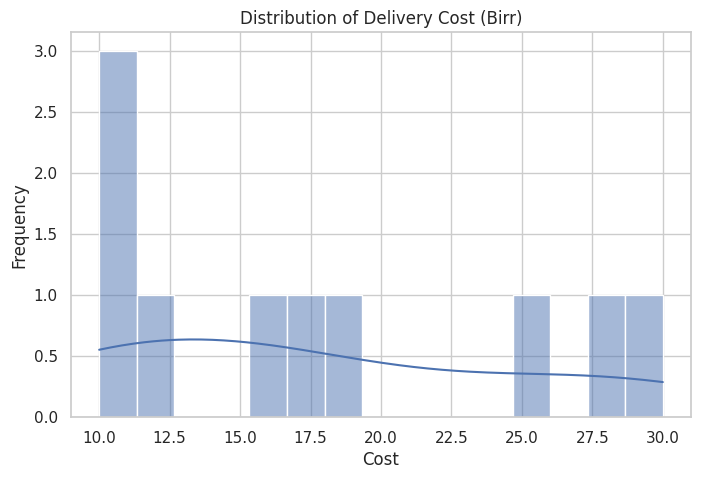

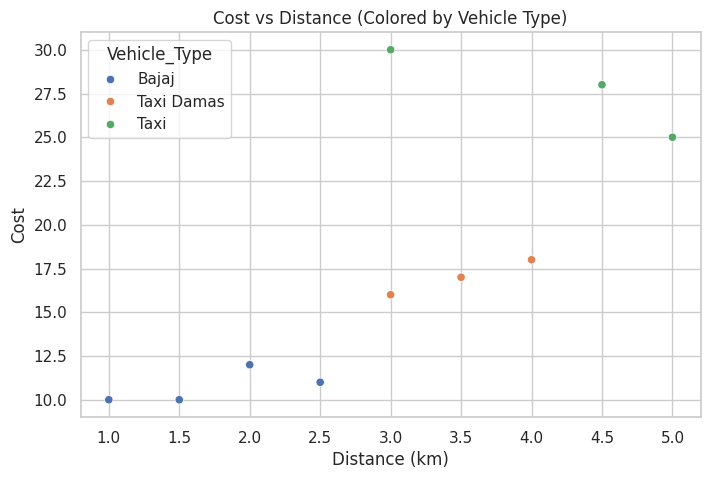

/tmp/ipython-input-7-3452571236.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Traffic_Level', y='Total_Delivery_Cost', palette="Set2")


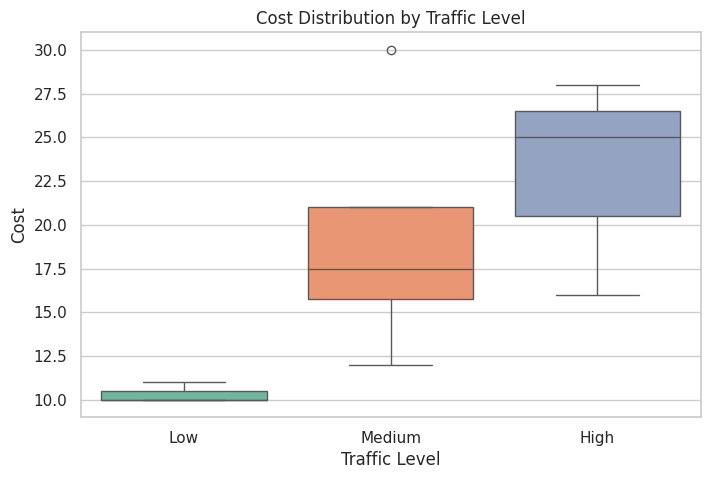

/tmp/ipython-input-7-3452571236.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Vehicle_Type', y='Total_Delivery_Cost', estimator='mean', ci=None)


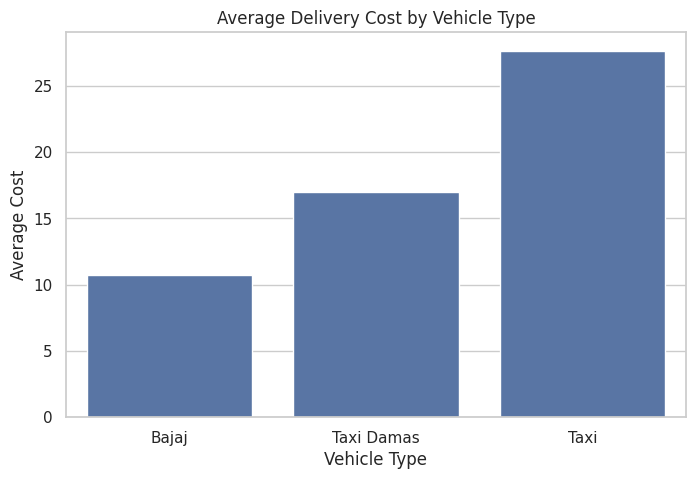

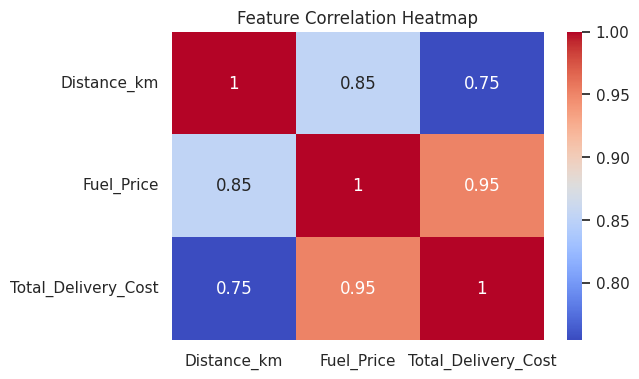

In [7]:

# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Distribution of Delivery Cost
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Delivery_Cost'], bins=15, kde=True)
plt.title("Distribution of Delivery Cost (Birr)")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

# 2. Delivery Cost vs Distance
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance_km', y='Total_Delivery_Cost', hue='Vehicle_Type')
plt.title("Cost vs Distance (Colored by Vehicle Type)")
plt.xlabel("Distance (km)")
plt.ylabel("Cost")
plt.show()

# 3. Average Cost by Traffic Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Traffic_Level', y='Total_Delivery_Cost', palette="Set2")
plt.title("Cost Distribution by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Cost")
plt.show()

# 4. Average Cost by Vehicle Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Vehicle_Type', y='Total_Delivery_Cost', estimator='mean', ci=None)
plt.title("Average Delivery Cost by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Cost")
plt.show()

# 5. Correlation Heatmap (only for numeric data)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Clean the data

In [8]:

# 4. Encode categorical features

label_cols = ['Traffic_Level', 'Vehicle_Type']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

# 5. Verify cleaned dataset
print("\n✅ Cleaned dataset info:")
print(df.info())

# Preview cleaned data
df.head()


✅ Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance_km          10 non-null     float64
 1   Traffic_Level        10 non-null     int64  
 2   Vehicle_Type         10 non-null     int64  
 3   Fuel_Price           10 non-null     int64  
 4   Total_Delivery_Cost  10 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 532.0 bytes
None


,Distance_km,Traffic_Level,Vehicle_Type,Fuel_Price,Total_Delivery_Cost
0,1.0,1,0,65,10
1,2.0,2,0,65,12
2,3.0,0,2,68,16
3,4.0,2,2,68,18
4,5.0,0,1,70,25


Split dataset

In [9]:

# 1. Define input features and target variable
X = df.drop('Total_Delivery_Cost', axis=1)  # Features
y = df['Total_Delivery_Cost']               # Target

# 2. Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Confirm shapes
print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ X_test shape: {X_test.shape}")
print(f"✅ y_train shape: {y_train.shape}")
print(f"✅ y_test shape: {y_test.shape}")

✅ X_train shape: (8, 4)
✅ X_test shape: (2, 4)
✅ y_train shape: (8,)
✅ y_test shape: (2,)


Model training

In [10]:

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Fit the model to training data
lr_model.fit(X_train, y_train)

# 3. Display model coefficients
print("📈 Model Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")

# 4. Intercept
print(f"\n🔗 Intercept: {lr_model.intercept_:.4f}")

📈 Model Coefficients:
Distance_km: -0.4096
Traffic_Level: 1.1476
Vehicle_Type: -3.0637
Fuel_Price: 4.3206

🔗 Intercept: -270.7676


Evaluation of linear regression model

In [11]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Predict on test set
y_pred = lr_model.predict(X_test)

# 2. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 3. Display results
print("📊 Model Evaluation (Linear Regression):")
print(f"➡ Mean Absolute Error (MAE): {mae:.2f}")
print(f"➡ R² Score: {r2:.2f}")

📊 Model Evaluation (Linear Regression):
➡ Mean Absolute Error (MAE): 0.53
➡ R² Score: 0.72


Random Forest model

In [15]:

# 1. Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict on test data
rf_pred = rf_model.predict(X_test)

# 4. Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# 5. Display performance
print("🌲 Random Forest Evaluation:")
print(f"➡ MAE: {rf_mae:.2f}")
print(f"➡ R² Score: {rf_r2:.2f}")

🌲 Random Forest Evaluation:
➡ MAE: 0.49
➡ R² Score: 0.55


Deploy with Gradio

In [17]:



# Assuming 'le_traffic' and 'le_vehicle' are your encoders
def predict_delivery_cost(distance, traffic_level, vehicle_type, fuel_price):
    # Encode inputs
    traffic_encoded = le_traffic.transform([traffic_level])[0]
    vehicle_encoded = le_vehicle.transform([vehicle_type])[0]

    # Create input array
    input_data = [[distance, traffic_encoded, vehicle_encoded, fuel_price]]

    # Predict using trained model
    prediction = rf_model.predict(input_data)[0]

    return f"Estimated Delivery Cost: {round(prediction, 2)} Birr"

In [18]:

iface = gr.Interface(
    fn=predict_delivery_cost,
    inputs=[
        gr.Number(label="Distance (km)"),
        gr.Radio(["Low", "Medium", "High"], label="Traffic Level"),
        gr.Radio(["Bajaj", "Taxi Damas", "Taxi"], label="Vehicle Type"),
        gr.Number(label="Fuel Price (ETB/L)")
    ],
    outputs=gr.Text(label="Predicted Delivery Cost"),
    title="🚚 Logistics Cost Predictor",
    description="Enter delivery details to estimate the cost using a trained Random Forest model."
)

# Launch the app
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d7fd5dfd436f413b63.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
